In [4]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00


In [1]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")#Handles text preprocessing and feature extraction before feeding into the model.
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [2]:
inputs = processor(text="Don't count the days, make the days count.", return_tensors="pt")

In [12]:
print(inputs)

{'input_ids': tensor([[ 4, 51,  8,  9, 31,  6,  4, 17,  8, 16,  9,  6,  4,  6, 11,  5,  4, 14,
          7, 22, 12, 23,  4, 18,  7, 28,  5,  4,  6, 11,  5,  4, 14,  7, 22, 12,
          4, 17,  8, 16,  9,  6, 26,  2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [5]:
from datasets import load_dataset

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

import torch

speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

cmu-arctic-xvectors.py:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

Loads a dataset containing precomputed speaker embeddings.
"Matthijs/cmu-arctic-xvectors": A dataset that provides x-vectors (speaker embeddings) extracted from the CMU Arctic dataset.
split="validation": Loads the validation split of the dataset.

In [6]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)#input ids from input's output

In [14]:
print("Spectrogram shape:", spectrogram.shape)
print("Spectrogram data type:", spectrogram.dtype)

Spectrogram shape: torch.Size([146, 80])
Spectrogram data type: torch.float32


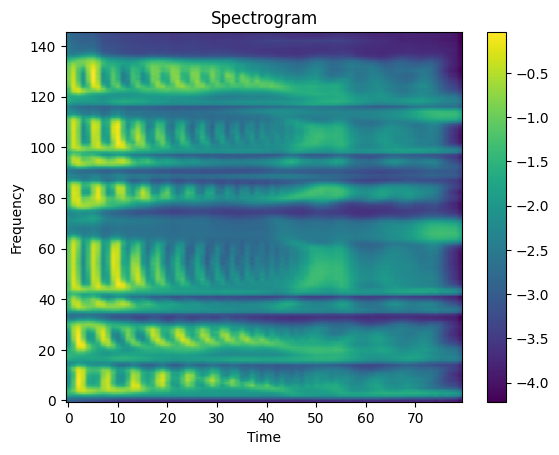

In [16]:
import matplotlib.pyplot as plt

plt.imshow(spectrogram.squeeze().cpu().numpy(), origin="lower", aspect="auto") # Convert to NumPy array and display
plt.colorbar()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.show()

Converting the Spectrogram to Speech

In [7]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [8]:
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

rate=16000: Sets the sampling rate to 16 kHz, which is standard for speech audio.

In [9]:
from IPython.display import Audio

Audio(speech, rate=16000)

**Bark**

In [22]:
from transformers import BarkModel, BarkProcessor

model = BarkModel.from_pretrained("suno/bark-small")
processor = BarkProcessor.from_pretrained("suno/bark-small")

**Massive Multilingual Speech (MMS)**

In [27]:
from transformers import VitsModel, VitsTokenizer

model = VitsModel.from_pretrained("facebook/mms-tts-deu")
tokenizer = VitsTokenizer.from_pretrained("facebook/mms-tts-deu")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [28]:
text_example = (
    "Ich bin Schnappi das kleine Krokodil, komm aus Ägypten das liegt direkt am Nil."
)

In [29]:
import torch

inputs = tokenizer(text_example, return_tensors="pt")
input_ids = inputs["input_ids"]


with torch.no_grad():
    outputs = model(input_ids)

speech = outputs["waveform"]

In [30]:
from IPython.display import Audio

Audio(speech, rate=16000)

In [31]:
#### for hindi

In [36]:
from transformers import VitsModel, VitsTokenizer
import torch
from IPython.display import Audio

# Load the Hindi TTS model and tokenizer
model = VitsModel.from_pretrained("facebook/mms-tts-hin")
tokenizer = VitsTokenizer.from_pretrained("facebook/mms-tts-hin")

# Define Hindi text
text_example = "नमस्ते! आप कैसे हैं? यह हिंदी भाषा का परीक्षण है।"

# Tokenize the text
inputs = tokenizer(text_example, return_tensors="pt")
input_ids = inputs["input_ids"]

# Generate speech
with torch.no_grad():
    outputs = model(input_ids)

# Extract speech waveform
speech = outputs["waveform"]

# Play the generated audio
Audio(speech.numpy(), rate=22050)
